# COMPARING MACHINE LEARNING ALGORITHMS

## STEP 1:LOAD DATA

In [26]:
from pandas import read_csv
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
print(dataset)

     target  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  Flavanoids  \
0         1    14.23        1.71  2.43               15.6        127           2.80        3.06   
1         1    13.20        1.78  2.14               11.2        100           2.65        2.76   
2         1    13.16        2.36  2.67               18.6        101           2.80        3.24   
3         1    14.37        1.95  2.50               16.8        113           3.85        3.49   
4         1    13.24        2.59  2.87               21.0        118           2.80        2.69   
5         1    14.20        1.76  2.45               15.2        112           3.27        3.39   
6         1    14.39        1.87  2.45               14.6         96           2.50        2.52   
7         1    14.06        2.15  2.61               17.6        121           2.60        2.51   
8         1    14.83        1.64  2.17               14.0         97           2.80        2.98   
9         

In [73]:
from sklearn.datasets import load_wine
wine = load_wine()

## STEP 2: DATA EXPLORATION

In [28]:
wine.keys()

dict_keys(['DESCR', 'target_names', 'data', 'feature_names', 'target'])

In [29]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)


Number of samples: 178
Number of features: 14


In [31]:
print(wine.data.shape)
print(wine.target.shape)

(178, 13)
(178,)


In [32]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [33]:
import numpy as np

np.bincount(wine.target)

array([59, 71, 48], dtype=int64)

### CLASS NAMES

In [34]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


### Peek at Your Data

In [35]:
# View first 20 rows
from pandas import read_csv
filename = 'wine.data.csv'
names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
peek = dataset.head(5)
print(peek)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  Flavanoids  \
1    14.23        1.71  2.43               15.6        127           2.80        3.06   
1    13.20        1.78  2.14               11.2        100           2.65        2.76   
1    13.16        2.36  2.67               18.6        101           2.80        3.24   
1    14.37        1.95  2.50               16.8        113           3.85        3.49   
1    13.24        2.59  2.87               21.0        118           2.80        2.69   

   Nonflavanoid_phenols  Proanthocyanins  Color intensity   Hue  OD280/OD315 of diluted wines  \
1                  0.28             2.29             5.64  1.04                          3.92   
1                  0.26             1.28             4.38  1.05                          3.40   
1                  0.30             2.81             5.68  1.03                          3.17   
1                  0.24             2.18             7.80  0.86              

### Dimensions of Your Data

In [36]:
from pandas import read_csv
filename = 'wine.data.csv'
names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
print(dataset.shape)

(178, 13)


### Data Type For Each Attribute

In [37]:
from pandas import read_csv
filename = 'wine.data.csv'
names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
print(dataset.dtypes)

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


##  Data Exploration Using Descriptive Statistics

In [38]:
from pandas import read_csv
from pandas import set_option
filename = 'wine.data.csv'
names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
description = dataset.describe()
print(description)

       alcohol  malic_acid      ash  alcalinity_of_ash  magnesium  total_phenols  Flavanoids  \
count  178.000     178.000  178.000            178.000    178.000        178.000     178.000   
mean    13.001       2.336    2.367             19.495     99.742          2.295       2.029   
std      0.812       1.117    0.274              3.340     14.282          0.626       0.999   
min     11.030       0.740    1.360             10.600     70.000          0.980       0.340   
25%     12.362       1.603    2.210             17.200     88.000          1.742       1.205   
50%     13.050       1.865    2.360             19.500     98.000          2.355       2.135   
75%     13.678       3.083    2.558             21.500    107.000          2.800       2.875   
max     14.830       5.800    3.230             30.000    162.000          3.880       5.080   

       Nonflavanoid_phenols  Proanthocyanins  Color intensity      Hue  \
count               178.000          178.000          178.000

### Class Distribution (Classification Only)

In [40]:
from pandas import read_csv
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
class_counts = dataset.groupby('target').size()
print(class_counts)

target
1    59
2    71
3    48
dtype: int64


### Correlations Between Attributes

In [42]:
from pandas import read_csv
from pandas import set_option
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
set_option('display.width', 100)
set_option('precision', 3)
correlations = dataset.corr(method='pearson')
print(correlations)

                              target  alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  \
target                         1.000   -0.328       0.438 -0.050              0.518     -0.209   
alcohol                       -0.328    1.000       0.094  0.212             -0.310      0.271   
malic_acid                     0.438    0.094       1.000  0.164              0.289     -0.055   
ash                           -0.050    0.212       0.164  1.000              0.443      0.287   
alcalinity_of_ash              0.518   -0.310       0.289  0.443              1.000     -0.083   
magnesium                     -0.209    0.271      -0.055  0.287             -0.083      1.000   
total_phenols                 -0.719    0.289      -0.335  0.129             -0.321      0.214   
Flavanoids                    -0.847    0.237      -0.411  0.115             -0.351      0.196   
Nonflavanoid_phenols           0.489   -0.156       0.293  0.186              0.362     -0.256   
Proanthocyanins     

### Skew of Univariate Distributions

In [43]:
from pandas import read_csv
from pandas import set_option
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
print(dataset.skew)

<bound method DataFrame.skew of      target  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  Flavanoids  \
0         1    14.23        1.71  2.43               15.6        127           2.80        3.06   
1         1    13.20        1.78  2.14               11.2        100           2.65        2.76   
2         1    13.16        2.36  2.67               18.6        101           2.80        3.24   
3         1    14.37        1.95  2.50               16.8        113           3.85        3.49   
4         1    13.24        2.59  2.87               21.0        118           2.80        2.69   
5         1    14.20        1.76  2.45               15.2        112           3.27        3.39   
6         1    14.39        1.87  2.45               14.6         96           2.50        2.52   
7         1    14.06        2.15  2.61               17.6        121           2.60        2.51   
8         1    14.83        1.64  2.17               14.0         97         

## STEP 3: Data Visualization To Understand The Data

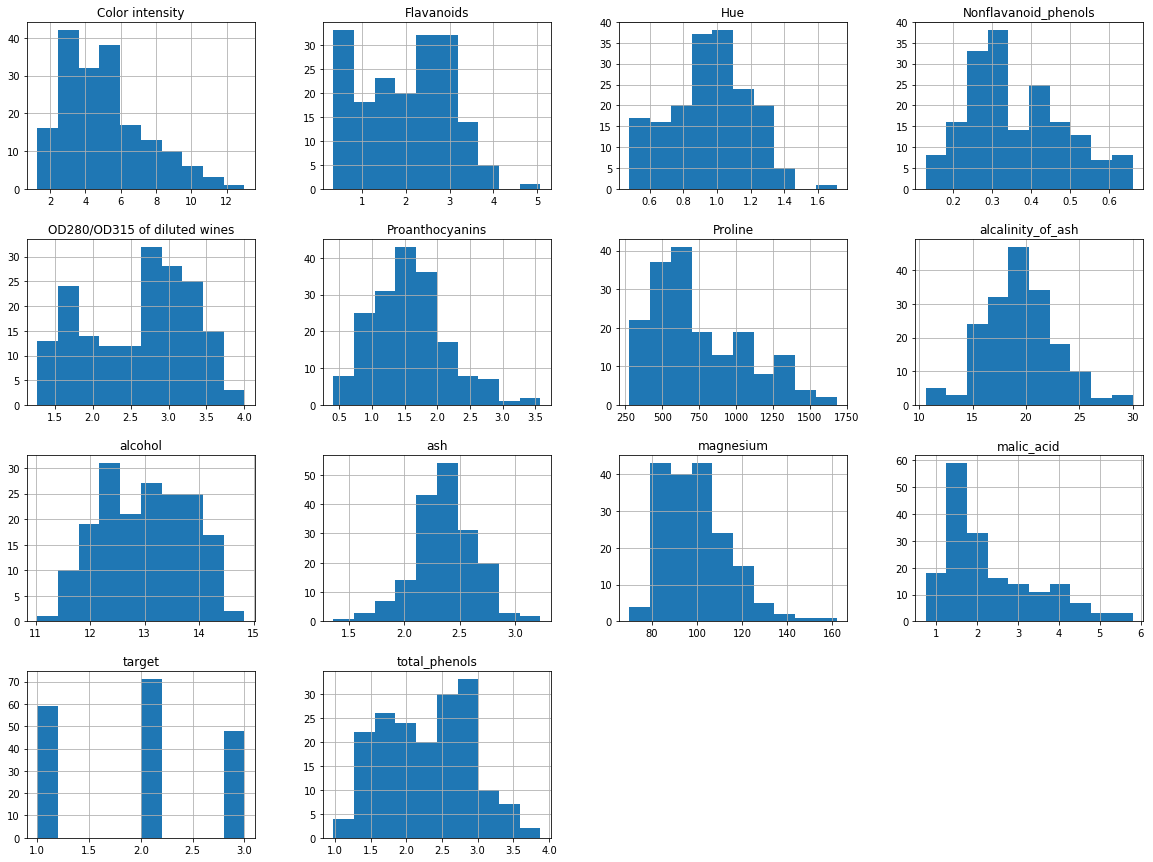

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
dataset.hist(figsize = (20,15))
plt.show()

## STEP 4: Data Preprocessing

### RESCALE DATA

In [46]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataset = read_csv(filename, names=names)
array = dataset.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,0]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.    0.842 0.192 0.572 0.258 0.62  0.628 0.574 0.283 0.593 0.372 0.455
  0.971]
 [0.    0.571 0.206 0.417 0.031 0.326 0.576 0.511 0.245 0.274 0.265 0.463
  0.78 ]
 [0.    0.561 0.32  0.701 0.412 0.337 0.628 0.612 0.321 0.757 0.375 0.447
  0.696]
 [0.    0.879 0.239 0.61  0.32  0.467 0.99  0.665 0.208 0.558 0.556 0.309
  0.799]
 [0.    0.582 0.366 0.807 0.536 0.522 0.628 0.496 0.491 0.445 0.259 0.455
  0.608]]


###  STANDARDZE DATA

In [47]:
from sklearn.preprocessing import StandardScaler
from pandas import read_csv
from numpy import set_printoptions
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:13]
Y = array[:,0]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[-1.214  1.519 -0.562  0.232 -1.17   1.914  0.809  1.035 -0.66   1.225
   0.252  0.362  1.848]
 [-1.214  0.246 -0.499 -0.828 -2.491  0.018  0.569  0.734 -0.821 -0.545
  -0.293  0.406  1.113]
 [-1.214  0.197  0.021  1.109 -0.269  0.088  0.809  1.216 -0.498  2.136
   0.269  0.318  0.789]
 [-1.214  1.692 -0.347  0.488 -0.809  0.931  2.491  1.467 -0.982  1.032
   1.186 -0.428  1.184]
 [-1.214  0.296  0.228  1.84   0.452  1.282  0.809  0.663  0.227  0.401
  -0.319  0.362  0.45 ]]


### NORMALIZE DATA

In [48]:
from sklearn.preprocessing import Normalizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.008 0.11  0.013 0.019 0.121 0.986 0.022 0.024]
 [0.01  0.13  0.018 0.021 0.11  0.984 0.026 0.027]
 [0.01  0.127 0.023 0.026 0.179 0.974 0.027 0.031]
 [0.009 0.125 0.017 0.022 0.146 0.98  0.033 0.03 ]
 [0.008 0.11  0.021 0.024 0.174 0.978 0.023 0.022]]


### BINARIZE DATA

In [50]:
# binarization
from sklearn.preprocessing import Binarizer
from pandas import read_csv
from numpy import set_printoptions
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


## STEP 5: Resampling Data To Train/Test The Machine Learning Models And Evaluate Performance

### Split into Train and Test Sets

In [52]:
# Evaluate using a train and a test set
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 100.000%


### K-fold Cross-Validation

In [53]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.444% (8.607%)


## STEP 6: Performance Metrics To Train & Evaluate Machine Learning Models

## Classification Metrics

### Classification Accuracy

In [55]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.944 (0.086)


### CONFUSION MATRIX

In [74]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

[[14  0  0]
 [ 0 27  0]
 [ 0  0 18]]


### CLASSIFICATION REPORT

In [67]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

        1.0       1.00      1.00      1.00        14
        2.0       1.00      1.00      1.00        27
        3.0       1.00      1.00      1.00        18

avg / total       1.00      1.00      1.00        59



## STEP 7: Linear Machine Learning Algorithms

### LOGISTIC REGRESSION

In [68]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
num_folds = 10
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.9444444444444444


## Nonlinear Machine Learning Algorithms

### k-Nearest Neighbors

In [69]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


### Naive Bayes

In [71]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
kfold = KFold(n_splits=10, random_state=7)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


### Classification and Regression Trees

In [72]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
kfold = KFold(n_splits=10, random_state=7)
model = DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

1.0


### Support Vector Machines

In [70]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
filename = 'wine.data.csv'
names = ['target', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',  'Proline']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,0]
kfold = KFold(n_splits=10, random_state=7)
model = SVC()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.8584967320261437


### Best algorithms are k nearest neighbors,classification and regression trees and support vector machines.